1. **Import Dataset**

In [1]:
from google.colab import files

# Upload file manually
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


2. **Load and inspect the dataset**

In [2]:
import os

# Check current files in Colab
print("Available files:", os.listdir())


Available files: ['.config', 'IMDB Dataset.csv', 'sample_data']


In [3]:
import pandas as pd

# Update this to match the uploaded file name
file_path = "IMDB Dataset.csv"  # Make sure the filename matches exactly

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
print("Dataset Loaded Successfully!\n")
print(df.head())

# Check dataset structure
df.info()

df.describe()



Dataset Loaded Successfully!

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


3. **Exploratory Data Analysis**

In [4]:
# Checking Missing & Duplicate Values

import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()
print("\n--- Missing Values in Each Column ---\n")
print(missing_values)

# Check for duplicate values
duplicate_entries = df.duplicated().sum()
print("\n--- Number of Duplicate Entries ---\n", duplicate_entries)

# If duplicates exist, drop them
df = df.drop_duplicates()
print("\nDataset shape after dropping duplicates:", df.shape)



--- Missing Values in Each Column ---

review       0
sentiment    0
dtype: int64

--- Number of Duplicate Entries ---
 418

Dataset shape after dropping duplicates: (49582, 2)


<ipython-input-5-a09538a70c0a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="coolwarm")


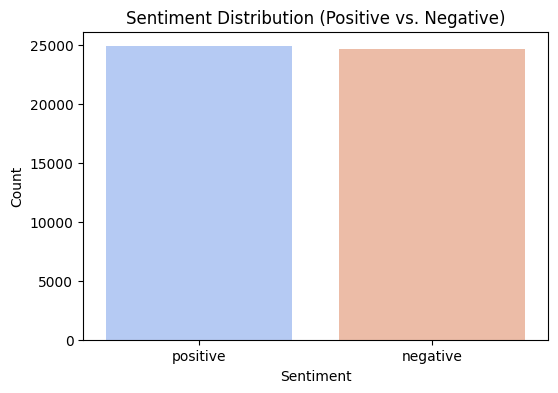

In [5]:
# Visualizing Sentiment Distribution
# Plot
plt.figure(figsize=(6, 4))
sns.countplot(x=df['sentiment'], palette="coolwarm")
plt.title("Sentiment Distribution (Positive vs. Negative)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


Analyzing Review Length Distribution

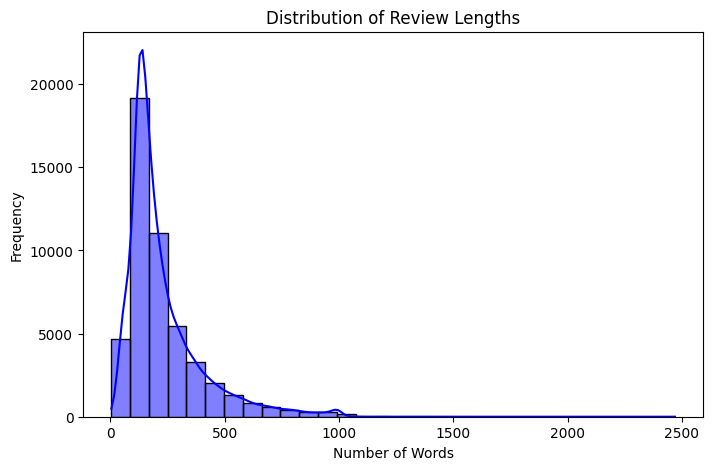

In [6]:
# Create a new column for review length
df["review_length"] = df["review"].apply(lambda x: len(x.split()))

# Plot histogram of review lengths
plt.figure(figsize=(8, 5))
sns.histplot(df["review_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()



--- Number of Outliers Based on Review Length: 3661 ---



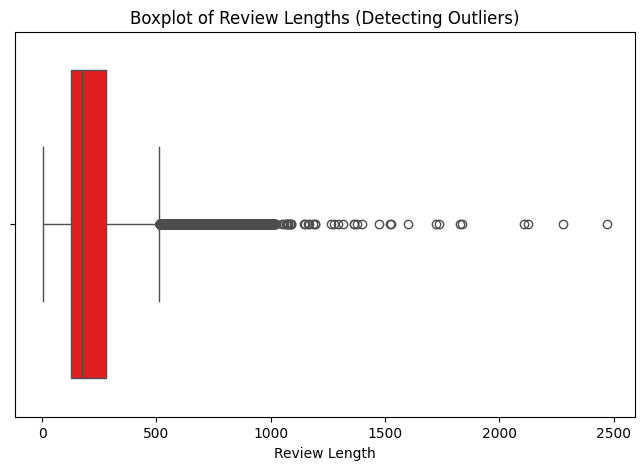


Dataset shape after outlier removal: (45921, 3)


In [7]:
import numpy as np

# Get review length statistics
review_lengths = df["review_length"]
q1 = np.percentile(review_lengths, 25)
q3 = np.percentile(review_lengths, 75)
iqr = q3 - q1

# Define outlier thresholds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Detect outliers
outliers = df[(df["review_length"] < lower_bound) | (df["review_length"] > upper_bound)]
print(f"\n--- Number of Outliers Based on Review Length: {len(outliers)} ---\n")

# Visualize outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["review_length"], color="red")
plt.title("Boxplot of Review Lengths (Detecting Outliers)")
plt.xlabel("Review Length")
plt.show()

# Remove outliers based on review length
df = df[(df["review_length"] >= lower_bound) & (df["review_length"] <= upper_bound)]

# Confirm dataset shape after removing outliers
print("\nDataset shape after outlier removal:", df.shape)


In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab') # Download the punkt_tab resource

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenize words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords and lemmatize
    return " ".join(words)

# Apply text cleaning to the dataset
df["cleaned_review"] = df["review"].apply(clean_text)

# Display sample cleaned reviews
print("\n--- Sample Cleaned Review ---\n")
print(df["cleaned_review"].iloc[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



--- Sample Cleaned Review ---

one reviewer mentioned watching 1 oz episode youll hooked right exactly happened mebr br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordbr br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awaybr br would say main appeal show due fact go show wouldnt dare forget pretty picture painted mainstream audience forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard wholl sold nickel inmate wholl kill order get away well mann

Check for the most frequent words in review

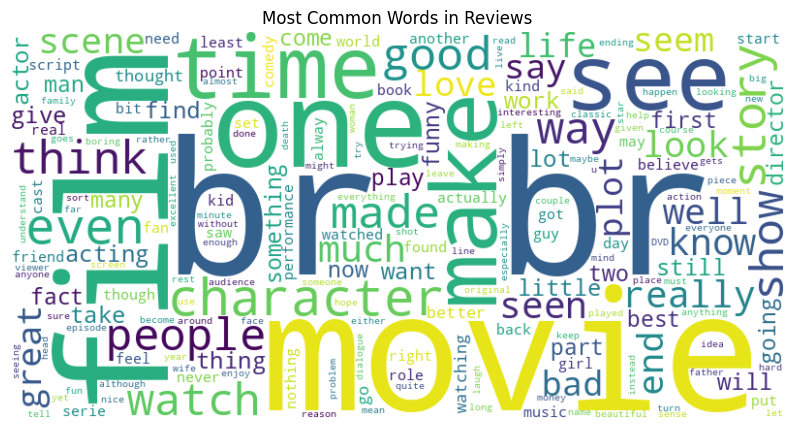

In [11]:
from wordcloud import WordCloud

# Join all reviews into one large text
all_reviews = " ".join(df["review"])

# Generate word cloud
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


Example of reviews (negative & positive)

In [12]:
# Show example of a positive review
sample_positive = df[df["sentiment"] == "positive"]["review"].iloc[0]
print("\n--- Sample Positive Review ---\n")
print(sample_positive)

# Show example of a negative review
sample_negative = df[df["sentiment"] == "negative"]["review"].iloc[0]
print("\n--- Sample Negative Review ---\n")
print(sample_negative)



--- Sample Positive Review ---

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main app

In [13]:
# Convert sentiment labels to numeric (0 = negative, 1 = positive)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

# Confirm encoding
print("\n--- Sentiment Encoding (0 = Negative, 1 = Positive) ---\n")
print(df["sentiment"].value_counts())



--- Sentiment Encoding (0 = Negative, 1 = Positive) ---

sentiment
0    23020
1    22901
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

# Split into 70% training, 15% validation, 15% test
X_train, X_temp, y_train, y_temp = train_test_split(df["cleaned_review"], df["sentiment"], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Confirm sizes
print("\n--- Dataset Splits ---\n")
print(f"Training Set: {len(X_train)}")
print(f"Validation Set: {len(X_val)}")
print(f"Test Set: {len(X_test)}")



--- Dataset Splits ---

Training Set: 32144
Validation Set: 6888
Test Set: 6889


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=10000, stop_words="english")

# Fit and transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Confirm shape of transformed data
print("\n--- TF-IDF Transformation Complete ---\n")
print(f"Training Set Shape: {X_train_tfidf.shape}")
print(f"Validation Set Shape: {X_val_tfidf.shape}")
print(f"Test Set Shape: {X_test_tfidf.shape}")



--- TF-IDF Transformation Complete ---

Training Set Shape: (32144, 10000)
Validation Set Shape: (6888, 10000)
Test Set Shape: (6889, 10000)


In [16]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Print confirmation
print("\nModel Training Successful!")



Model Training Successful!



--- Model Evaluation Metrics ---

Accuracy: 0.8872
Precision: 0.8779
Recall: 0.9024
F1 Score: 0.8900
ROC-AUC Score: 0.8870


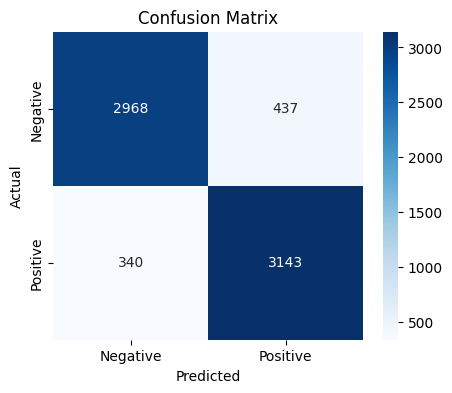

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Predict on validation set
y_pred = model.predict(X_val_tfidf)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)

# Print evaluation results
print("\n--- Model Evaluation Metrics ---\n")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Display confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


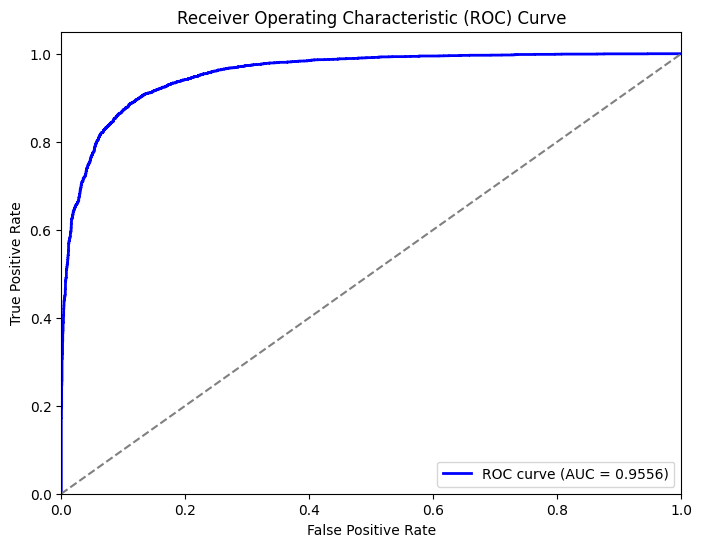

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability predictions for the positive class
y_pred_prob = model.predict_proba(X_val_tfidf)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [19]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'imdb_sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully!")


Model and vectorizer saved successfully!


In [20]:
from google.colab import files

# Download the model
files.download('imdb_sentiment_model.pkl')

# Download the vectorizer
files.download('tfidf_vectorizer.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>